Project COVID map of 2020 Across U.S. States

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import fiona
import json

In [46]:
# Load the COVID-19 data
covid_data_path = '/home/jovyan/work/cybergis-jupyter-notebook-repo/python_intro/Project/COVID_2020.csv'
covid_data = pd.read_csv(covid_data_path)

# Clean the COVID-19 data
covid_data.columns = covid_data.columns.str.strip()  # Remove any leading/trailing spaces
covid_data = covid_data[['name', 'count']].copy()  # Assuming 'name' contains state names and 'count' is case numbers
covid_data.columns = ['GeoName', '2020_Cases']  # Standardize column names
covid_data['2020_Cases'] = pd.to_numeric(covid_data['2020_Cases'], errors='coerce')
covid_data.dropna(subset=['GeoName', '2020_Cases'], inplace=True)

# Load the shapefile using fiona and convert it to GeoJSON for Folium compatibility
shapefile_path = '/home/jovyan/work/cybergis-jupyter-notebook-repo/python_intro/Project/States_shapefile.shp'
with fiona.open(shapefile_path) as shp:
    simplified_geo = {
        "type": "FeatureCollection",
        "features": [feature for feature in shp]
    }

# Create the choropleth map using Folium
covid_map = folium.Map(location=[37.8, -96], zoom_start=4)

state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", 
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", 
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", 
    "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", 
    "Nebraska": "NE", "Nevada": "NV", "New_Hampshire": "NH", "New_Jersey": "NJ", 
    "New_Mexico": "NM", "New_York": "NY", "North_Carolina": "NC", "North_Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
    "Rhode_Island": "RI", "South_Carolina": "SC", "South_Dakota": "SD", 
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", 
    "Virginia": "VA", "Washington": "WA", "West_Virginia": "WV", "Wisconsin": "WI", 
    "Wyoming": "WY"
}

covid_data['GeoName'] = covid_data['GeoName'].map(state_abbrev)

folium.Choropleth(
    geo_data=simplified_geo,
    data=covid_data,
    columns=["GeoName", "2020_Cases"],
    key_on="feature.properties.State_Code",  # Adjust this if needed
    fill_color="RdYlBu",
    fill_opacity=1,
    line_opacity=0.2,
    bins=[0, 5000, 10000, 20000, 30000, 40000, 50000, 70000, 90000, 100000, 200000],
    legend_name="COVID-19 Cases (2020)",
).add_to(covid_map)

# Add layer control to switch between visual layers
folium.LayerControl().add_to(covid_map)

# Save the map to an HTML file
covid_map.save("/home/jovyan/work/cybergis-jupyter-notebook-repo/python_intro/Project/COVID_2020_US_Map_Final.html")

covid_map

The graph of cases between every state

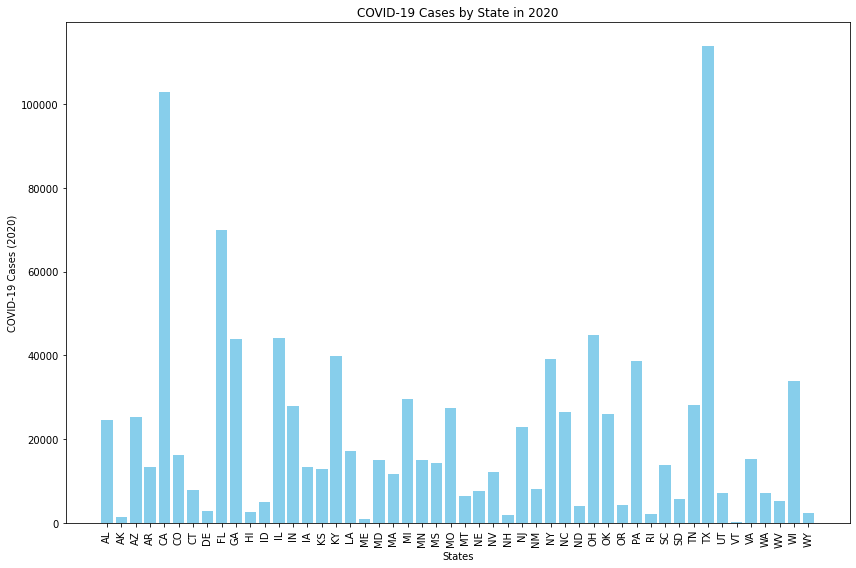

In [33]:
covid_data.columns = ['GeoName', '2020_Cases']  # Standardize column names

# Drop rows where 'GeoName' or '2020_Cases' is missing
covid_data = covid_data.dropna(subset=['GeoName', '2020_Cases'])

# Convert '2020_Cases' to numeric, ensuring proper conversion
covid_data['2020_Cases'] = pd.to_numeric(covid_data['2020_Cases'], errors='coerce')

# Drop any rows where '2020_Cases' could not be converted to a number
covid_data = covid_data.dropna(subset=['2020_Cases'])

# Convert '2020_Cases' to integer for cleaner plotting
covid_data['2020_Cases'] = covid_data['2020_Cases'].astype(int)

# Generate a bar graph to show COVID-19 cases for each state
plt.figure(figsize=(12, 8))
plt.bar(covid_data['GeoName'], covid_data['2020_Cases'], color='skyblue')
plt.xlabel('States')
plt.ylabel('COVID-19 Cases (2020)')
plt.title('COVID-19 Cases by State in 2020')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()